In [1]:
#!pip install Flask --upgrade
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import re
import numpy as np

from fitter import Fitter, get_common_distributions, get_distributions
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.datasets import make_friedman3, make_s_curve
from sklearn.linear_model import BayesianRidge, ElasticNet
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neural_network import MLPClassifier

#!pip install imbalanced-learn
#!pip install lightgbm
#!pip install wittgenstein --user
#!pip install explainerdashboard --user

from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# for Box-Cox Transformation
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px

from tqdm import tqdm
import math

from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame

#Multilabel Stratified K Fold Creation
#!pip install iterative-stratification
import sys
sys.path.append('../input/iterative-stratification/iterative-stratification-master')
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [2]:
#Collect data from sensors (i.e., time-series data) installed in the manufacturing system 
ai4i2020_encoded_balanced=pd.read_csv(r'..\\..\\dataset\\raw_data\\ai4i2020_encoded_balanced.csv')
ai4i2020_encoded_balanced.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# Run in local
# Fold index
fold = 1

original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
original_X_test = pd.read_csv('G:\\.shortcut-targets-by-id\\1-wapAl6N5YrCs68c4NiFKyvybXTXmdgZ\\Ph_D_Tyrovolas\\Our Papers\\3rd_Paper-Proposal\\Testbed Codes\\AI4I_Case_Study\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")

In [4]:
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [5]:
acc_list = []
auc_list = []
kappa_list = []

## Fuzzy Cognitive Map

In [6]:
from numpy import genfromtxt
y_train_pred_fcm = genfromtxt(r'..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_pred_fcm.csv", delimiter=',')
y_test_pred_fcm = genfromtxt(r'..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_pred_fcm.csv", delimiter=',')
fcm_pred_class_train = genfromtxt(r'..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\fcm_pred_class_train.csv", delimiter=',')
fcm_pred_class_test = genfromtxt(r'..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\fcm_pred_class_test.csv", delimiter=',')

<Axes: >

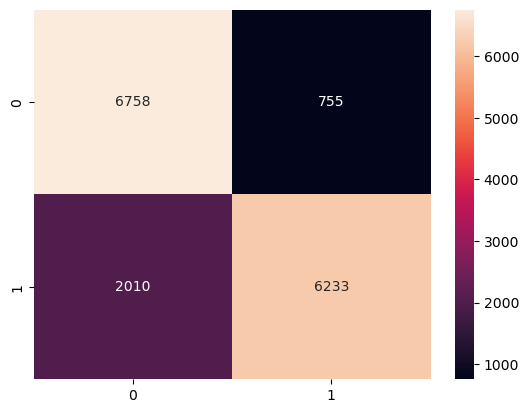

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, fcm_pred_class_train)
sns.heatmap(confusion_matrix(y_train, fcm_pred_class_train), annot=True,fmt='d')

In [8]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,fcm_pred_class_train))
print("Recall Score: ",recall_score(y_train, fcm_pred_class_train))
print("F1 Score: ",f1_score(y_train, fcm_pred_class_train))
print("Accuracy Score: ",accuracy_score(y_train, fcm_pred_class_train))

Precision Score:  0.8919576416714368
Recall Score:  0.7561567390513163
F1 Score:  0.8184623465301032
Accuracy Score:  0.8245112972835745


#### Evaluating on Test set 

In [9]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

print("Precision Score: ",precision_score(y_test, fcm_pred_class_test))
print("Recall Score: ",recall_score(y_test, fcm_pred_class_test))
print("F1 Score: ",f1_score(y_test, fcm_pred_class_test))
print("Accuracy Score: ",accuracy_score(y_test, fcm_pred_class_test))

Precision Score:  0.8835534213685474
Recall Score:  0.8034934497816594
F1 Score:  0.8416237850200115
Accuracy Score:  0.8418046830382638


In [10]:
#calculate AUC of model
from sklearn import metrics
auc_fcm = metrics.roc_auc_score(y_test, y_test_pred_fcm)
print(auc_fcm)

0.8755667703893523


In [11]:
cohen_score_fcm = cohen_kappa_score(y_test, fcm_pred_class_test)
cohen_score_fcm

0.6843182597727349

In [12]:
acc_list.append(metrics.accuracy_score(y_test, fcm_pred_class_test))
auc_list.append(auc_fcm)
kappa_list.append(cohen_score_fcm)

## Explainable Boosting Machine (EBM)

Default parameters were used, as suggested by the library originators [6,11] and also to specifically assess how well the algorithm performed “out-of-box”. Specifically, 5000 rounds of boosting were used with a learning rate of 0.01. We obtained all graphics representing the one-dimensional feature functions for each predictor variable, two-dimensional feature functions for included interactions, and global importance estimates based on mean absolute scores. We also explored local predictions for selected points.

6. Nori, H.; Jenkins, S.; Koch, P.; Caruana, R. InterpretML: A Unified Framework for Machine Learning Interpretability. arXiv 2019, arXiv:1909.09223. [Google Scholar]

11. Nori, H.; Caruana, R.; Bu, Z.; Shen, J.H.; Kulkarni, J. Accuracy, Interpretability, and Differential Privacy via Explainable Boosting. arXiv 2021, arXiv:2106.09680. [Google Scholar]

In [13]:
from interpret.glassbox import ExplainableBoostingClassifier
seed = 50
ebm = ExplainableBoostingClassifier(random_state=seed)

ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(random_state=50)

In [14]:
ebm.get_params()

{'early_stopping_rounds': 50,
 'early_stopping_tolerance': 0.0001,
 'exclude': [],
 'feature_names': None,
 'feature_types': None,
 'greediness': 0.0,
 'inner_bags': 0,
 'interactions': 10,
 'learning_rate': 0.01,
 'max_bins': 256,
 'max_interaction_bins': 32,
 'max_leaves': 3,
 'max_rounds': 5000,
 'min_samples_leaf': 2,
 'n_jobs': -2,
 'objective': 'log_loss',
 'outer_bags': 8,
 'random_state': 50,
 'smoothing_rounds': 0,
 'validation_size': 0.15}

In [15]:
#Predict the response for train dataset
y_train_pred_ebm = ebm.predict(X_train)

print("Explainable Boosting Machine score: ",ebm.score(X_train, y_train))

Explainable Boosting Machine score:  0.9980959634424981


<Axes: >

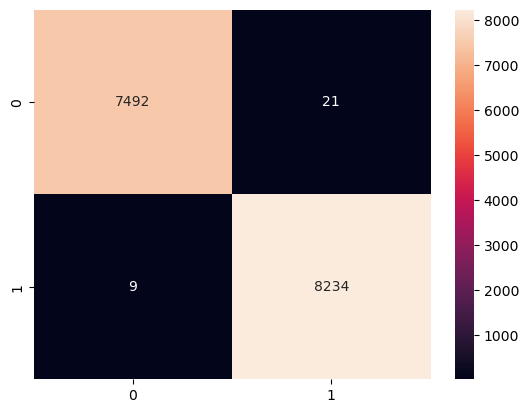

In [16]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_ebm)
sns.heatmap(confusion_matrix(y_train, y_train_pred_ebm), annot=True,fmt='d')

In [17]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,y_train_pred_ebm))
print("Recall Score: ",recall_score(y_train,y_train_pred_ebm))
print("F1 Score: ",f1_score(y_train, y_train_pred_ebm))
print("Accuracy Score: ",accuracy_score(y_train,y_train_pred_ebm))

Precision Score:  0.9974560872198668
Recall Score:  0.9989081645032148
F1 Score:  0.9981815977694265
Accuracy Score:  0.9980959634424981


#### Evaluating on Test set 

In [18]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_ebm = ebm.predict(X_test)


print("Precision Score: ",precision_score(y_test, y_test_pred_ebm))
print("Recall Score: ",recall_score(y_test, y_test_pred_ebm))
print("F1 Score: ",f1_score(y_test, y_test_pred_ebm))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_ebm))

Precision Score:  0.9848975188781014
Recall Score:  0.9967248908296943
F1 Score:  0.9907759088442756
Accuracy Score:  0.9902912621359223


In [19]:
from sklearn import metrics
#calculate AUC of model
auc_ebm = metrics.roc_auc_score(y_test, y_test_pred_ebm)
print(auc_ebm)

0.9899792118819131


In [20]:
cohen_score_ebm = cohen_kappa_score(y_test, y_test_pred_ebm)

In [21]:
acc_list.append(accuracy_score(y_test, y_test_pred_ebm))
auc_list.append(auc_ebm)
kappa_list.append(cohen_score_ebm)

#### Global explanations

In [22]:
from interpret import show
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7001/2871402212096/ -->

#### Local explanations

In [23]:
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

<!-- http://127.0.0.1:7001/2871428943584/ -->

## LightGBM

In [24]:
# build the lightgbm model
import lightgbm as lgb
lgbmc_clf = lgb.LGBMClassifier()
lgbmc_clf.fit(X_train, y_train.values.ravel())

LGBMClassifier()

In [25]:
#Predict the response for train dataset
y_train_pred_lgbmc = lgbmc_clf.predict(X_train)

print("LightGBM Classifier score: ",lgbmc_clf.score(X_train, y_train))

LightGBM Classifier score:  0.9996826605737497


<Axes: >

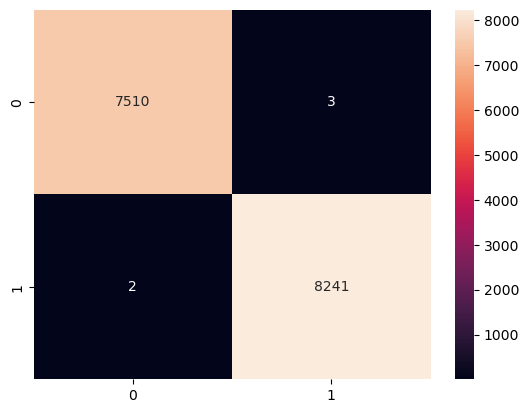

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_lgbmc)
sns.heatmap(confusion_matrix(y_train, y_train_pred_lgbmc), annot=True,fmt='d')

In [27]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,y_train_pred_lgbmc))
print("Recall Score: ",recall_score(y_train, y_train_pred_lgbmc))
print("F1 Score: ",f1_score(y_train, y_train_pred_lgbmc))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_lgbmc))

Precision Score:  0.9996360989810772
Recall Score:  0.9997573698896033
F1 Score:  0.9996967307575666
Accuracy Score:  0.9996826605737497


#### Hyper-parameter Tuning for LightGBM

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

lgb=lgb.LGBMClassifier()
#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

#Define the scoring
grid_search_lgbmc_clf=GridSearchCV(lgb,parameters,scoring='accuracy')
grid_search_lgbmc_clf.fit(X_train, y_train.values.ravel())


In [ ]:
cvres = pd.DataFrame(grid_search_lgbmc_clf.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
grid_search_lgbmc_clf.best_estimator_

#### Evaluating on Test set 

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_lgbmc = grid_search_lgbmc_clf.best_estimator_.predict(X_test)


print("Precision Score: ",precision_score(y_test, y_test_pred_lgbmc))
print("Recall Score: ",recall_score(y_test, y_test_pred_lgbmc))
print("F1 Score: ",f1_score(y_test, y_test_pred_lgbmc))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_lgbmc))

In [ ]:
from sklearn import metrics
#calculate AUC of model
auc_lgbmc = metrics.roc_auc_score(y_test, y_test_pred_lgbmc)
print(auc_lgbmc)

In [ ]:
cohen_score_lgbmc = cohen_kappa_score(y_test, y_test_pred_lgbmc)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_lgbmc))
auc_list.append(auc_lgbmc)
kappa_list.append(cohen_score_lgbmc)

## RIPPER
The Ripper method is a classification algorithm based on rules. The training set is used to generate a set of rules. It’s a common rule-induction algorithm

In [ ]:
import wittgenstein as lw
ripper_clf = lw.RIPPER() # Or irep_clf = lw.IREP() to build a model using IREP
ripper_clf.fit(X_train, y_train.values.ravel()) # Or pass X and y data to .fit
ripper_clf

The model predicts positive class if any of the inner-nested condition-combinations are all true.  The word that you will often see that indicates a union is "or" and intersection is "and"

In [ ]:
ripper_clf.out_model()

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_train_pred_ripper = ripper_clf.predict(X_train)

#Default scoring metric is accuracy.
accuracy = ripper_clf.score(X_train,  y_train.values.ravel())
precision = ripper_clf.score(X_train,  y_train.values.ravel())
recall = ripper_clf.score(X_train,  y_train.values.ravel())
cond_count = ripper_clf.ruleset_.count_conds()
print(f'accuracy: {accuracy} precision: {precision} recall: {recall} conds: {cond_count}')

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_ripper)
sns.heatmap(confusion_matrix(y_train, y_train_pred_ripper), annot=True,fmt='d')

#### Hyper-parameter Tuning for RIPPER

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid_ripper = {"prune_size": [0.33, 0.5], "k": [1, 2]}
grid_ripper = GridSearchCV(estimator=lw.RIPPER(), param_grid=param_grid_ripper)
grid_ripper.fit(X_train, y_train.values.ravel())

In [ ]:
cvres = pd.DataFrame(grid_ripper.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
grid_ripper.best_estimator_

#### Evaluating on Test set 

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_test_pred_ripper = grid_ripper.best_estimator_.predict(X_test)

#Default scoring metric is accuracy.
accuracy = grid_ripper.best_estimator_.score(X_test,  y_test.values.ravel())
precision = grid_ripper.best_estimator_.score(X_test, y_test.values.ravel(), precision_score)
recall = grid_ripper.best_estimator_.score(X_test, y_test.values.ravel(), recall_score)
cond_count = grid_ripper.best_estimator_.ruleset_.count_conds()
print(f'accuracy: {accuracy} precision: {precision} recall: {recall} conds: {cond_count}')

In [ ]:
from sklearn import metrics
#calculate AUC of model
auc_ripper = metrics.roc_auc_score(y_test, y_test_pred_ripper)
print(auc_ripper)

In [ ]:
cohen_score_ripper = cohen_kappa_score(y_test, y_test_pred_ripper)

In [ ]:
acc_list.append(accuracy)
auc_list.append(auc_ripper)
kappa_list.append(cohen_score_ripper)

We can also ask our model to tell us why it made each positive prediction that it did:

In [ ]:
grid_ripper.best_estimator_.predict(X_test, give_reasons=True)

In [ ]:
give_reasons = grid_ripper.best_estimator_.predict(X_test, give_reasons=True)

In [ ]:
give_reasons[1]

## K-Nearest Neighbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())

In [ ]:
#Predict the response for train dataset
y_train_pred_knn = knn.predict(X_train)

print("K-Nearest Neighbour score: ",knn.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_knn)
sns.heatmap(confusion_matrix(y_train, y_train_pred_knn), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,y_train_pred_knn))
print("Recall Score: ",recall_score(y_train, y_train_pred_knn))
print("F1 Score: ",f1_score(y_train, y_train_pred_knn))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_knn))

#### Hyper-parameter Tuning for K-Nearest Neighbour (KNN)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

grid_search_knn.fit(X_train, y_train.values.ravel())

In [ ]:
cvres = pd.DataFrame(grid_search_knn.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
grid_search_knn.best_estimator_

#### Evaluating on Test set 

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_knn = grid_search_knn.best_estimator_.predict(X_test)


print("Precision Score: ",precision_score(y_test, y_test_pred_knn))
print("Recall Score: ",recall_score(y_test, y_test_pred_knn))
print("F1 Score: ",f1_score(y_test, y_test_pred_knn))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_knn))

In [ ]:
from sklearn import metrics
#calculate AUC of model
auc_knn = metrics.roc_auc_score(y_test, y_test_pred_knn)
print(auc_knn)

In [ ]:
cohen_score_knn = cohen_kappa_score(y_test, y_test_pred_knn)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_knn))
auc_list.append(auc_knn)
kappa_list.append(cohen_score_knn)

## Decision Tree 

In [ ]:
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_clf.fit(X_train,y_train.values.ravel())

In [ ]:
#Predict the response for train dataset
y_train_pred_dt = dt_clf.predict(X_train)

print("Decision Tree score: ",dt_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_dt)
sns.heatmap(confusion_matrix(y_train, y_train_pred_dt), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,y_train_pred_dt))
print("Recall Score: ",recall_score(y_train, y_train_pred_dt))
print("F1 Score: ",f1_score(y_train, y_train_pred_dt))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_dt))

#### Fine Tuning for Decision Tree

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_clf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


grid_search.fit(X_train, y_train.values.ravel())

In [ ]:
cvres = pd.DataFrame(grid_search.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
grid_search.best_estimator_

#### Evaluating on Test set 

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_dt = grid_search.best_estimator_.predict(X_test)


print("Precision Score: ",precision_score(y_test, y_test_pred_dt))
print("Recall Score: ",recall_score(y_test, y_test_pred_dt))
print("F1 Score: ",f1_score(y_test, y_test_pred_dt))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_dt))

In [ ]:
from sklearn import metrics
#calculate AUC of model
auc_dt = metrics.roc_auc_score(y_test, y_test_pred_dt)
print(auc_dt)

In [ ]:
cohen_score_dt = cohen_kappa_score(y_test, y_test_pred_dt)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_dt))
auc_list.append(auc_dt)
kappa_list.append(cohen_score_dt)

## MLPClassifier

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train,y_train.values.ravel())

In [ ]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [ ]:
#Predict the response for train dataset
y_train_pred_mlp_clf = mlp_clf.predict(X_train)

print("MLPClassifier score: ",mlp_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_mlp_clf)
sns.heatmap(confusion_matrix(y_train, y_train_pred_mlp_clf), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train,y_train_pred_mlp_clf))
print("Recall Score: ",recall_score(y_train, y_train_pred_mlp_clf))
print("F1 Score: ",f1_score(y_train, y_train_pred_mlp_clf))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_mlp_clf))

#### Hyper Parameter Tuning

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

mlp = MLPClassifier(max_iter=300)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train,y_train.values.ravel())
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
clf.best_estimator_

#### Evaluating on Test set 

In [ ]:
#Predict the response for test dataset
y_test_pred_mlp_clf = clf.best_estimator_.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_mlp_clf))
print("Recall Score: ",recall_score(y_test, y_test_pred_mlp_clf))
print("F1 Score: ",f1_score(y_test, y_test_pred_mlp_clf))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_mlp_clf))

In [ ]:
from sklearn.metrics import classification_report

# confusion matrix
print(confusion_matrix(y_test, y_test_pred_mlp_clf)) # order matters! (actual, predicted)

print(classification_report(y_test, y_test_pred_mlp_clf))

In [ ]:
#calculate AUC of model
from sklearn import metrics
auc_ann = metrics.roc_auc_score(y_test, y_test_pred_mlp_clf)
print(auc_ann)

In [ ]:
cohen_score_ann = cohen_kappa_score(y_test, y_test_pred_mlp_clf)

In [ ]:
acc_list.append(metrics.accuracy_score(y_test, y_test_pred_mlp_clf))
auc_list.append(metrics.roc_auc_score(y_test, y_test_pred_mlp_clf))
kappa_list.append(cohen_score_ann)

## Support Vector Machine

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train.values.ravel())

In [ ]:
#Predict the response for train dataset
y_train_pred_svm = svm_clf.predict(X_train)

print("Support Vector Machine score: ",svm_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_svm)
sns.heatmap(confusion_matrix(y_train, y_train_pred_svm), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_svm))
print("Recall Score: ",recall_score(y_train, y_train_pred_svm))
print("F1 Score: ",f1_score(y_train, y_train_pred_svm))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_svm))

#### Fine Tuning for Support Vector Machine

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

rnd_search_svm = GridSearchCV(svm_clf,param_grid,refit=True,verbose=2)
rnd_search_svm.fit(X_train, y_train.values.ravel())

In [ ]:
cvres = pd.DataFrame(rnd_search_svm.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
rnd_search_svm.best_estimator_

#### Evaluating on Test set


In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_svm = rnd_search_svm.best_estimator_.predict(X_test)
#y_test_pred_sgd = sgd_clf.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_svm))
print("Recall Score: ",recall_score(y_test, y_test_pred_svm))
print("F1 Score: ",f1_score(y_test, y_test_pred_svm))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_svm))

In [ ]:
from sklearn import metrics
#calculate AUC of model
auc_svm = metrics.roc_auc_score(y_test, y_test_pred_svm)
print(auc_svm)

In [ ]:
cohen_score_svm = cohen_kappa_score(y_test, y_test_pred_svm)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_svm))
auc_list.append(auc_svm)
kappa_list.append(cohen_score_svm)

## Gaussian Naive Bayes Classifier

In [ ]:
%%time
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train.values.ravel())

#### Evaluating on Training Set

In [ ]:
#Predict the response for train dataset
y_train_pred_nb = nb_clf.predict(X_train)

print("Naive Bayes score: ",nb_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_nb)
sns.heatmap(confusion_matrix(y_train, y_train_pred_nb), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_nb))
print("Recall Score: ",recall_score(y_train, y_train_pred_nb))
print("F1 Score: ",f1_score(y_train, y_train_pred_nb))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_nb))

### Hyper-parameter Tuning for Gaussian Naive Bayes

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

NB_distribution = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_clf = GaussianNB()       

rnd_search_nb = RandomizedSearchCV(nb_clf, param_distributions = NB_distribution, random_state = 42) 
rnd_search_nb.fit(X_train, y_train.values.ravel()) 

In [ ]:
cvres = pd.DataFrame(rnd_search_nb.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
rnd_search_nb.best_estimator_

#### Evaluating on Test set

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
#y_test_pred_nb = nb_clf.predict(X_test)
y_test_pred_nb = rnd_search_nb.best_estimator_.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_nb))
print("Recall Score: ",recall_score(y_test, y_test_pred_nb))
print("F1 Score: ",f1_score(y_test, y_test_pred_nb))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_nb))

In [ ]:
#calculate AUC of model
from sklearn import metrics
auc_nb = metrics.roc_auc_score(y_test, y_test_pred_nb)
print(auc_nb)

In [ ]:
cohen_score_nb = cohen_kappa_score(y_test, y_test_pred_nb)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_nb))
auc_list.append(auc_nb)
kappa_list.append(cohen_score_nb)

## Stochastic Gradient Descent

In [ ]:
%%time
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train.values.ravel())

#### Evaluating on Train set

In [ ]:
#Predict the response for train dataset
y_train_pred_sgd = sgd_clf.predict(X_train)
print("Stochastic Gradient Descent Classifier score: ",sgd_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred_sgd)
sns.heatmap(confusion_matrix(y_train, y_train_pred_sgd), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_sgd))
print("Recall Score: ",recall_score(y_train, y_train_pred_sgd))
print("F1 Score: ",f1_score(y_train, y_train_pred_sgd))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_sgd))

### Fine Tuning for Stochastic Gradient Descent

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import scipy.stats as stats
from sklearn.utils.fixes import loguniform

param_distribs = {
        "average": [True, False],
        "loss":['hinge', 'log_loss', 'modified_huber', 'squared_hinge',  'perceptron'],
        "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        "learning_rate":['constant', 'optimal', 'invscaling', 'adaptive'],
        "class_weight":[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
        "eta0":[1, 10, 100],
        "penalty":['l2', 'l1', 'elasticnet']
    }
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
rnd_search_SGD = RandomizedSearchCV(sgd_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search_SGD.fit(X_train, y_train.values.ravel())

In [ ]:
cvres = pd.DataFrame(rnd_search_SGD.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
rnd_search_SGD.best_estimator_

#### Evaluating on Test set

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_sgd = rnd_search_SGD.best_estimator_.predict(X_test)
#y_test_pred_sgd = sgd_clf.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_sgd))
print("Recall Score: ",recall_score(y_test, y_test_pred_sgd))
print("F1 Score: ",f1_score(y_test, y_test_pred_sgd))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_sgd))

In [ ]:
from sklearn import metrics
#calculate AUC of model
auc_sgd = metrics.roc_auc_score(y_test, y_test_pred_sgd)
print(auc_sgd)

In [ ]:
cohen_score_sgd = cohen_kappa_score(y_test, y_test_pred_sgd)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_sgd))
auc_list.append(auc_sgd)
kappa_list.append(cohen_score_sgd)

## Logistic Regression

In [ ]:
%%time
#logistic regression for targets 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_predict

log_clf = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=42)
log_clf.fit(X_train, y_train.values.ravel())

#### Evaluating on Train set

In [ ]:
#Predict the response for train dataset
y_train_pred_log = log_clf.predict(X_train)
print("Logistic Regression score: ",log_clf.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(y_train, y_train_pred_log)
sns.heatmap(confusion_matrix(y_train, y_train_pred_log), annot=True,fmt='d')

In [ ]:
#Performance measures for training dataset
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_log))
print("Recall Score: ",recall_score(y_train, y_train_pred_log))
print("F1 Score: ",f1_score(y_train, y_train_pred_log))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_log))

### Fine Tuning for Logistic Regression

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=42)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2'],
                     solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
rnd_search_LR = RandomizedSearchCV(logistic, distributions, random_state=42)
rnd_search_LR.fit(X_train, y_train.values.ravel())

In [ ]:
cvres = pd.DataFrame(rnd_search_LR.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
rnd_search_LR.best_estimator_

#### Evaluating on Test set

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score

#Predict the response for test dataset
y_test_pred_log = rnd_search_LR.best_estimator_.predict(X_test)
#y_test_pred_log = log_clf.predict(X_test)

print("Precision Score: ",precision_score(y_test, y_test_pred_log))
print("Recall Score: ",recall_score(y_test, y_test_pred_log))
print("F1 Score: ",f1_score(y_test, y_test_pred_log))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_log))

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_log)
#calculate AUC of model
auc_log = metrics.roc_auc_score(y_test, y_test_pred_log)
print(auc_log)

In [ ]:
cohen_score_log = cohen_kappa_score(y_test, y_test_pred_log)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_log))
auc_list.append(auc_log)
kappa_list.append(cohen_score_log)

In [ ]:
# Get importance of each feature
w0 = rnd_search_LR.best_estimator_.intercept_[0]
w = w1, w2, w3, w4, w5, w6 = rnd_search_LR.best_estimator_.coef_[0]

feature_names = X_train.columns

feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e,w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending = False)



In [ ]:
feature_importance

In [ ]:
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y = 'importance')
plt.show()

## XGBOOST

In [ ]:
!pip install xgboost

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
%%time
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train.values.ravel())

#### Evaluating on Train set

In [ ]:
#Predict the response for train dataset
y_train_pred_xgb = xgb_classifier.predict(X_train)
print("XGBoost score: ",xgb_classifier.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(y_train, y_train_pred_xgb)
sns.heatmap(confusion_matrix(y_train, y_train_pred_xgb), annot=True,fmt='d')


In [ ]:
#Performance measures for training dataset

from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
print("Precision Score: ",precision_score(y_train, y_train_pred_xgb))
print("Recall Score: ",recall_score(y_train, y_train_pred_xgb))
print("F1 Score: ",f1_score(y_train, y_train_pred_xgb))
print("Accuracy Score: ",accuracy_score(y_train, y_train_pred_xgb))

#### Fine Tuning for XGBoost

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

xgb_classifier = XGBClassifier(random_state=42)

XG_distributions = dict(n_estimators=[100,200,300,400,500,600,700,800, 900, 1000],
                     max_depths = [2, 5, 10, 20],
                     learning_rate=[0.1,0.15,0.2,0.25,0.3],
                     colsample_bytree=[0.5,0.6,0.7,0.8,0.9,1],
                     subsample=[0.5,0.6,0.7,0.8,0.9,1],
                     grow_policy = ['depthwise', 'lossguide'],
                     booster = ['gbtree', 'gblinear', 'dart'],
                     sampling_method = ['uniform','gradient_based'])
rnd_search_XG = RandomizedSearchCV(xgb_classifier, XG_distributions, random_state=42)
rnd_search_XG.fit(X_train, y_train)

In [ ]:
cvres = pd.DataFrame(rnd_search_XG.cv_results_).sort_values(by=['rank_test_score'])
for mean_score, params,rank in zip(cvres["mean_test_score"], cvres["params"],cvres["rank_test_score"]):
    print("Rank {}# - Score: {} - {}".format(rank, np.sqrt(mean_score), params))

In [ ]:
rnd_search_XG.best_estimator_

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [ ]:
y_test_pred_xgb = rnd_search_XG.best_estimator_.predict(X_test)

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_pred_xgb), annot=True,fmt='d')

In [ ]:
#Performance measures for test dataset
from sklearn.metrics import precision_score, recall_score,f1_score 
print("Precision Score: ",precision_score(y_test, y_test_pred_xgb))
print("Recall Score: ",recall_score(y_test, y_test_pred_xgb))
print("F1 Score: ",f1_score(y_test, y_test_pred_xgb))
print("Accuracy Score: ",accuracy_score(y_test, y_test_pred_xgb))

In [ ]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred_xgb)
#calculate AUC of model
auc_xgb = metrics.roc_auc_score(y_test, y_test_pred_xgb)
print(auc_xgb)


In [ ]:
cohen_score_xgb = cohen_kappa_score(y_test, y_test_pred_xgb)

In [ ]:
acc_list.append(accuracy_score(y_test, y_test_pred_xgb))
auc_list.append(auc_xgb)
kappa_list.append(cohen_score_xgb)

## Draw ROC curve and PR curve

### For Training Set

In [ ]:
from sklearn.metrics import roc_curve

#Fuzzy Cognitive Map
fpr_FCM, tpr_FCM, thresholds_FCM = roc_curve(y_train, y_train_pred_fcm)

#------------------------------------------------------------------------------------------------#

#Explainable Boosting Machine
fpr_EBM, tpr_EBM, thresholds_EBM= roc_curve(y_train, y_train_pred_ebm)

#------------------------------------------------------------------------------------------------#

#LightGBM Classifier
fpr_LGBM, tpr_LGBM, thresholds_LGBM = roc_curve(y_train, y_train_pred_lgbmc)

#------------------------------------------------------------------------------------------------#

#RIPPER (Repeated Incremental Pruning to Produce Error Reduction)
fpr_RIPPER, tpr_RIPPER, thresholds_RIPPER = roc_curve(y_train, y_train_pred_ripper)

#------------------------------------------------------------------------------------------------#

#Decision Tree
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_train, y_train_pred_dt)

#------------------------------------------------------------------------------------------------#

#K-Nearest Neighbour (KNN)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_train, y_train_pred_knn)

#------------------------------------------------------------------------------------------------#

#MLP Classifier
fpr_MLP, tpr_MLP, thresholds_MLP = roc_curve(y_train, y_train_pred_mlp_clf)

#------------------------------------------------------------------------------------------------#

#Support Vector Machine
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_train,  y_train_pred_svm)

#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
fpr_SGD, tpr_SGD, thresholds_SGD = roc_curve(y_train, y_train_pred_sgd)

#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_train, y_train_pred_nb)

#------------------------------------------------------------------------------------------------#

# Linear Regresison
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_train, y_train_pred_log)

#------------------------------------------------------------------------------------------------#

# XGBoost
fpr_XG, tpr_XG, thresholds_XG = roc_curve(y_train, y_train_pred_xgb)

In [ ]:
plt.figure(figsize=(12, 10))              

#Fuzzy Cognitive Map
plt.plot(fpr_FCM, tpr_FCM, linewidth=2, label="Fuzzy Cognitive Map")

#------------------------------------------------------------------------------------------------#

#Explainable Boosting Machine
plt.plot(fpr_EBM, tpr_EBM, linewidth=2, label="EBM")

#------------------------------------------------------------------------------------------------#

#LightGBM Classifier
plt.plot(fpr_LGBM, tpr_LGBM, linewidth=2, label="LightGBM")

#------------------------------------------------------------------------------------------------#

#RIPPER (Repeated Incremental Pruning to Produce Error Reduction)
plt.plot(fpr_RIPPER, tpr_RIPPER, linewidth=2, label="RIPPER")

#------------------------------------------------------------------------------------------------#

#K-Nearest Neighbour (KNN)
plt.plot(fpr_KNN, tpr_KNN, linewidth=2, label="K-Nearest Neighbour")

#------------------------------------------------------------------------------------------------#

#Decision Tree
plt.plot(fpr_DT, tpr_DT, linewidth=2, label="Decision Tree")

#------------------------------------------------------------------------------------------------#

#MLP Classifier
plt.plot(fpr_MLP, tpr_MLP, linewidth=2, label="MLP Classifier")

#------------------------------------------------------------------------------------------------#

#Support Vector Machine
plt.plot(fpr_SVM, tpr_SVM, linewidth=2, label="Support Vector Machine")

#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
plt.plot(fpr_SGD, tpr_SGD, linewidth=2, label="Stochastic Gradient Descent")

#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
plt.plot(fpr_NB, tpr_NB, "m-", linewidth=2, label="Gaussian Naive Bayes")

#------------------------------------------------------------------------------------------------#

# Linear Regresison
plt.plot(fpr_LR, tpr_LR, linewidth=2, label="Logistic Regression")

#------------------------------------------------------------------------------------------------#

# XGBoost
plt.plot(fpr_XG, tpr_XG, linewidth=2, label="XGBoost")

#------------------------------------------------------------------------------------------------#


# fpr_SGD_90 = fpr_SGD[np.argmax(tpr_SGD >= 0.9)]           

# plt.plot([fpr_SGD_90, fpr_SGD_90], [0., 0.9], "r:")
# plt.plot([0.0, fpr_SGD_90], [0.9, 0.9], "r:")  
# plt.plot([fpr_SGD_90], [0.9], "ro")   

# AUC curve
plt.plot([0, 1], [0, 1], 'k--')
# plt.axis([0, 1, 0, 1])



plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)

plt.legend(loc=4)
plt.grid(True)      
plt.show()

### For Test Set

In [ ]:
from sklearn.metrics import roc_curve

#Fuzzy Cognitive Map
fpr_FCM, tpr_FCM, thresholds_FCM = roc_curve(y_test, y_test_pred_fcm)

#------------------------------------------------------------------------------------------------#

#Explainable Boosting Machine
fpr_EBM, tpr_EBM, thresholds_EBM = roc_curve(y_test, y_test_pred_ebm)

#------------------------------------------------------------------------------------------------#

#LightGBM Classifier
fpr_LGBM, tpr_LGBM, thresholds_LGBM = roc_curve(y_test, y_test_pred_lgbmc)

#------------------------------------------------------------------------------------------------#

#RIPPER (Repeated Incremental Pruning to Produce Error Reduction)
fpr_RIPPER, tpr_RIPPER, thresholds_RIPPER = roc_curve(y_test, y_test_pred_ripper)

#------------------------------------------------------------------------------------------------#

#K-Nearest Neighbour (KNN)
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_test_pred_knn)

#------------------------------------------------------------------------------------------------#

#Decision Tree
fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_test, y_test_pred_dt)

#------------------------------------------------------------------------------------------------#

#MLP Classifier
fpr_MLP, tpr_MLP, thresholds_MLP = roc_curve(y_test, y_test_pred_mlp_clf)

#------------------------------------------------------------------------------------------------#

#Support Vector Machine
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, y_test_pred_svm)

#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
fpr_SGD, tpr_SGD, thresholds_SGD = roc_curve(y_test, y_test_pred_sgd)

#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, y_test_pred_nb)

#------------------------------------------------------------------------------------------------#

# Linear Regresison
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_test_pred_log)

#------------------------------------------------------------------------------------------------#

# XGBoost
fpr_XG, tpr_XG, thresholds_XG = roc_curve(y_test, y_test_pred_xgb)

In [ ]:
plt.figure(figsize=(12, 10))                                    

#Fuzzy Cognitive Map
plt.plot(fpr_FCM, tpr_FCM, linewidth=2, label="Fuzzy Cognitive Map")

#------------------------------------------------------------------------------------------------#

#Explainable Boosting Machine
plt.plot(fpr_EBM, tpr_EBM, linewidth=2, label="EBM")

#------------------------------------------------------------------------------------------------#

#LightGBM Classifier
plt.plot(fpr_LGBM, tpr_LGBM, linewidth=2, label="LightGBM")

#------------------------------------------------------------------------------------------------#

#RIPPER (Repeated Incremental Pruning to Produce Error Reduction)
plt.plot(fpr_RIPPER, tpr_RIPPER, linewidth=2, label="RIPPER")

#------------------------------------------------------------------------------------------------#

#K-Nearest Neighbour (KNN)
plt.plot(fpr_KNN, tpr_KNN, linewidth=2, label="K-Nearest Neighbour")

#------------------------------------------------------------------------------------------------#

#Decision Tree
plt.plot(fpr_DT, tpr_DT, linewidth=2, label="Decision Tree")

#------------------------------------------------------------------------------------------------#

#MLP Classifier
plt.plot(fpr_MLP, tpr_MLP, linewidth=2, label="MLP Classifier")


#------------------------------------------------------------------------------------------------#

#Support Vector Machine
plt.plot(fpr_SVM, tpr_SVM, linewidth=2, label="Support Vector Machine")


#------------------------------------------------------------------------------------------------#

# Stochastic Gradient Descent
plt.plot(fpr_SGD, tpr_SGD, linewidth=2, label="Stochastic Gradient Descent")


#------------------------------------------------------------------------------------------------#

# Gaussian Naive Bayes
plt.plot(fpr_NB, tpr_NB, "m-", linewidth=2, label="Gaussian Naive Bayes")

#------------------------------------------------------------------------------------------------#

# Linear Regresison
plt.plot(fpr_LR, tpr_LR, linewidth=2, label="Logistic Regression")


#------------------------------------------------------------------------------------------------#

# XGBoost
plt.plot(fpr_XG, tpr_XG, linewidth=2, label="XGBoost")

#------------------------------------------------------------------------------------------------#


# fpr_SGD_90 = fpr_SGD[np.argmax(tpr_SGD >= 0.9)]           

# plt.plot([fpr_SGD_90, fpr_SGD_90], [0., 0.9], "r:")
# plt.plot([0.0, fpr_SGD_90], [0.9, 0.9], "r:")  
# plt.plot([fpr_SGD_90], [0.9], "ro")   

# AUC curve
plt.plot([0, 1], [0, 1], 'k--')
# plt.axis([0, 1, 0, 1])



plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)

plt.legend(loc=4)
plt.grid(True)      
plt.show()

## The area under curve (AUC)
Through AUC you can summarize the performance of each classifier into a single measure when comparing different classifiers. Calculating the area under the ROC curve, abbreviated as AUC, is a typical method.


In [ ]:
model_list = ['IF-FCM', 'LightGBM', 'RIPPER', 'K-Nearest Neighbour' ,'Decision Tree', 'MLP Classifier', 'Support Vector Machine', 'Stochastic Gradient Descent', 'Gaussian Naive Bayes', 'Logistic Regression', 'XGBoost']

#accuracy and AUC
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list, 'Kappa':kappa_list})
final_df = result_df.sort_values(by=['AUC'], ascending=False)
final_df = final_df.reset_index(drop=True)
final_df

# Explainability

## Global Explanations

### Leave One Feature Out (LOFO)
LOFO first evaluates the performance of the model with all the input features included, then iteratively removes one feature at a time, retrains the model, and evaluates its performance on a validation set. The mean and standard deviation (across the folds) of the importance of each feature is then reported.


In [ ]:
!pip install lofo-importance
concat_df = pd.concat([X_train, y_train], axis=1)

In [ ]:
from sklearn.model_selection import KFold
from lofo import LOFOImportance, Dataset, plot_importance

# define the validation scheme
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# set target
target = "Machine failure"

# define the binary target and the features
dataset = Dataset(df=concat_df, target=target, features=[col for col in concat_df.columns if col != target])

# define the validation scheme and scorer. The default model is LightGBM
lofo_imp = LOFOImportance(dataset, cv=cv, scoring="roc_auc" , model=grid_search_lgbmc_clf.best_estimator_)

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

#Save global feature importance for each model
#importance_df.to_csv('Global_Feat_Import_ML_mdl\\xgb.csv')

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(12, 20), kind="box")

In [ ]:
glob_feat_imp_mean_ml=pd.read_csv(r"Global_Feat_Import_ML_mdl\\gl_ft_imp_mn.csv")
glob_feat_imp_std_ml=pd.read_csv(r"Global_Feat_Import_ML_mdl\\glob_feat_imp_std_ml.csv")

model = glob_feat_imp_mean_ml["Model"].tolist()

#Mean error
toolwear_mean_err = glob_feat_imp_mean_ml["Toolwearmin"].tolist()
torque_mean_err = glob_feat_imp_mean_ml["TorqueNm"].tolist()
pr_type_mean_err = glob_feat_imp_mean_ml["Type"].tolist()
airtemperature_mean_err = glob_feat_imp_mean_ml["AirtemperatureK"].tolist()
processtemperature_mean_err = glob_feat_imp_mean_ml["ProcesstemperatureK"].tolist()
rotationalspeedrpm_mean_err = glob_feat_imp_mean_ml["Rotationalspeedrpm"].tolist()

#Standard deviation
toolwear_std = glob_feat_imp_std_ml["Toolwearmin"].tolist()
torque_std = glob_feat_imp_std_ml["TorqueNm"].tolist()
pr_typer_std = glob_feat_imp_std_ml["Type"].tolist()
airtemperaturer_std = glob_feat_imp_std_ml["AirtemperatureK"].tolist()
processtemperaturer_std = glob_feat_imp_std_ml["ProcesstemperatureK"].tolist()
rotationalspeedrpmr_std = glob_feat_imp_std_ml["Rotationalspeedrpm"].tolist()

 
# Initialise the spider plot by setting figure size and polar projection
plt.figure(figsize=(14, 10))
axes =plt.subplot(polar=True)
axes.spines['polar'].set_visible(False)
axes.set_yticklabels([])

theta = np.linspace(0, 2 * np.pi, len(toolwear_mean_err))
 
# Arrange the grid into number of sales equal parts in degrees
lines, labels = plt.thetagrids(range(0, 360, int(360/len(model))), (model))
 
# Plot actual sales graph
#plt.plot(theta, toolwear_mean_err)
plt.errorbar(theta, toolwear_mean_err, yerr=toolwear_std, fmt='.C1')
plt.fill(theta, toolwear_mean_err, 'C1', alpha=0.2)

# Plot expected sales graph
#plt.plot(theta, torque_mean_err)
plt.errorbar(theta, torque_mean_err, yerr=torque_std, fmt='.g')
plt.fill(theta, torque_mean_err, 'g', alpha=0.2)

# Plot expected sales graph
#plt.plot(theta, pr_type_mean_err)
plt.errorbar(theta, pr_type_mean_err, yerr=pr_typer_std, fmt='.r')
plt.fill(theta, pr_type_mean_err, 'r', alpha=0.3)

# Plot expected sales graph
#plt.plot(theta, airtemperature_mean_err)
plt.errorbar(theta, airtemperature_mean_err, yerr=airtemperaturer_std, fmt='.k')
plt.fill(theta, airtemperature_mean_err, 'p', alpha=0.4)

# Plot expected sales graph
#plt.plot(theta, processtemperature_mean_err)
plt.errorbar(theta, processtemperature_mean_err, yerr=processtemperaturer_std, fmt='.m')
plt.fill(theta, processtemperature_mean_err, 'm', alpha=0.5)


# Plot expected sales graph
#plt.plot(theta, rotationalspeedrpm_mean_err)
plt.errorbar(theta, rotationalspeedrpm_mean_err, yerr=rotationalspeedrpmr_std, fmt='.k')
plt.fill(theta, rotationalspeedrpm_mean_err, 'k', alpha=0.6)

# Add legend and title for the plot
plt.legend(labels=('Tool wear', 'Torque', 'Type', 'Air Temperature', 'Process Temperature', 'Rotational Speed'), loc=(0, 1.05), mode='expand',ncol=3)
 
# Dsiplay the plot on the screen
plt.show()

## Global Explainability using Permutation Importance 

In [ ]:
!pip install eli5 --user
import eli5
from eli5.sklearn import PermutationImportance
  
# create permutation importance object using model
# and fit on test set
perm = PermutationImportance(rnd_search_XG.best_estimator_, random_state=1).fit(X_test, y_test.values.ravel())
  
# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

## Local Explanations

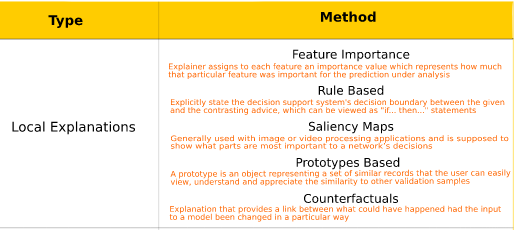

In this paper, since we want to evaluate the model's root cause analysis capabilities, we focus only on feature importance.

In [ ]:
#Different models:
#fcm: fcm_pred_class_test
#lgbmc_clf: y_test_pred_lgbmc
#ripper_clf: See the model's explanations in RIPPER cells 
#knn: y_test_pred_knn
#dt_clf: y_test_pred_dt
#MLP: y_test_pred_mlp_clf
#svm_clf: y_test_pred_svm
#rnd_search_nb.best_estimator_: y_test_pred_nb
#rnd_search_SGD.best_estimator_: y_test_pred_sgd
#rnd_search_LR.best_estimator_: y_test_pred_log
#rnd_search_XG.best_estimator_:  y_test_pred_xgb

#Find the observations' indexes that the model correctly predicted as faulty
#y: Expected values of the model's output
y=y_test;
true_positive_indexes = []
i=1;

#According to the chosen model
#For example, y_test_pred_lgbmc for LGBM Classifier
for k in range(0,len(y)):
    if (y.loc[k,'Machine failure']==int(y_test_pred_svm[k])) and (y.loc[k,'Machine failure']==1):
        true_positive_indexes.append(k)
        i=i+1;

        
#Find the observations that the selected model correctly predicted as faulty based on the previous indexes
true_positive_observations = pd.DataFrame()
for k in range(0,len(true_positive_indexes)):
    new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y.loc[true_positive_indexes[k],:]], axis=0)
    true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)

    
#Find the observations that the selected model correctly predicted correctly as faulty along with the failure modes

true_positive_observations_with_failure_modes = pd.DataFrame()
#for index1 in range(0,len(true_positive_observations)):
    #for index2 in range (0,len(ai4i2020_encoded_balanced)):
        #if true_positive_observations.loc[index1,:].equals(ai4i2020_encoded_balanced.loc[index2,"Type":"Machine failure"]) == True:
            #print(index1)
            #true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.append(ai4i2020_encoded_balanced.loc[index2,:], ignore_index=True)
true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Machine failure']), ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Machine failure'], how='right')       
final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)

display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

number_of_TWF_failures_in_true_positive_predictions = 0
number_of_HDF_failures_in_true_positive_predictions = 0
number_of_PWF_failures_in_true_positive_predictions = 0
number_of_OSF_failures_in_true_positive_predictions = 0
number_of_random_failures_in_true_positive_predictions=0

for k in range(0,len(final_true_positive_observations_with_failure_modes)):
    if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
        number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
    if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
        number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
    if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
        number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
    if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
        number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
    if (final_true_positive_observations_with_failure_modes.loc[k,"Machine failure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
        number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;

display("Number of TWF failures: " + str(number_of_TWF_failures_in_true_positive_predictions))
display("Number of HDF failures: " + str(number_of_HDF_failures_in_true_positive_predictions))
display("Number of PWF failures: " + str(number_of_PWF_failures_in_true_positive_predictions))
display("Number of OSF failures: " + str(number_of_OSF_failures_in_true_positive_predictions))
display("Number of RNF failures: " + str(number_of_random_failures_in_true_positive_predictions))

In [ ]:
#Interacitve Widget in order to see each true positive observation along with the failure modes

from IPython.display import display
from IPython.display import clear_output
from ipywidgets import Output
from ipywidgets import widgets


text = widgets.Text()
display(text)

out = widgets.Output()
display(out)

def handle_submit(sender):
    with out:
        clear_output()
        index = int(text.value)
        print(final_true_positive_observations_with_failure_modes.loc[index,:])
        print('\n')
        print("Dataset index for the above true positive observation (starting from 0 index): " + str(true_positive_indexes[index]))
        
text.on_submit(handle_submit)



* TWF: The tool is replaced or fails after a random **Tool wear**
* HDF: If the **temperature** differential between the **air** and the **process** is less than 8.6 K while at the same time the tool's **rotational speed** is less than 1380 rpm
* PWF: If the product of **torque** and **rotational speed** in rad/sis less than 3500 W or greater than 9000 W
* OSF: The product of **tool wear**, and **torque**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard.datasets import titanic_survive, titanic_names
from explainerdashboard import InlineExplainer
import shap

#If you want to explore the entire dashboard 
#ExplainerDashboard(ClassifierExplainer(lgbmc_clf.fit(X_train, y_train.values.ravel()), X_test, y_test)).run()

#Different models:
#fcm: fcm_pred_class_test
#lgbmc_clf: grid_search_lgbmc_clf.best_estimator_.fit(X_train, y_train.values.ravel()
#ripper_clf: See the model's explanations in RIPPER cells 
#knn: grid_search_knn.best_estimator_.fit(X_train, y_train.values.ravel())
#dt_clf: grid_search.best_estimator_.fit(X_train,y_train.values.ravel())
#MLP: clf.best_estimator_.fit(X_train, y_train.values.ravel())
#svm_clf: rnd_search_svm.best_estimator_.fit(X_train, y_train.values.ravel())
#rnd_search_nb.best_estimator_: rnd_search_nb.best_estimator_.fit(X_train, y_train.values.ravel()) 
#rnd_search_SGD.best_estimator_: rnd_search_SGD.best_estimator_.fit(X_train, y_train.values.ravel())
#rnd_search_LR.best_estimator_: rnd_search_LR.best_estimator_.fit(X_train, y_train.values.ravel())
#rnd_search_XG.best_estimator_:  rnd_search_XG.best_estimator_.fit(X_train, y_train)


explainer = ClassifierExplainer(rnd_search_svm.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
InlineExplainer(explainer).shap.contributions_graph()

In [ ]:
# load JS visualization code to notebook
shap.initjs()

#Shap values for each observation in the test dataset
shap_values = explainer.get_shap_values_df(1)

#Calculate the correct explanations
correct_explanations = 0
correct_explanations_TWF = 0
correct_explanations_HDF = 0
correct_explanations_PWF = 0
correct_explanations_OSF = 0

for k in range(0,len(true_positive_observations)):
    #if the failure mode is TWF
    if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
        #if tool wear is the most important feature
        if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
            correct_explanations = correct_explanations+1;
            correct_explanations_TWF = correct_explanations_TWF + 1;
    
    #if the failure mode is HDF
    if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
        maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
        maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
        if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
            correct_explanations = correct_explanations+1;
            correct_explanations_HDF = correct_explanations_HDF + 1;
            
    #if the failure mode is PWF
    if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
        maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
        maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
        if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
            correct_explanations = correct_explanations+1;
            correct_explanations_PWF = correct_explanations_PWF + 1;
            
    #if the failure mode is OSF        
    if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
        maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
        maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
        if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
            correct_explanations = correct_explanations+1;
            correct_explanations_OSF = correct_explanations_OSF + 1;

print("TWF: %.4f success, HDF: %.4f success, PWF: %.4f success, OSF: %.4f success \n\n" % (correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions,correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions,correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions,correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions))

average_success = ((correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)+(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)+(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)+(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions))/4

print("Through the model, %d correct explanations are made in the true positive predictions with average success: %.4f \n\n" % (correct_explanations, average_success))


## Calculate the evaluation metrics for all folds of the best estimators  

## Explainable Boosting Machine

In [ ]:
acc_folds_best_estimator_ebm = []
auc_folds_best_estimator_ebm = []
kappa_folds_best_estimator_ebm = []
twf_folds_best_estimator_ebm = []
hdf_folds_best_estimator_ebm = []
pwf_folds_best_estimator_ebm = []
osf_folds_best_estimator_ebm = []
av_folds_best_estimator_ebm = []
fold_list_ebm = []


for fold in range(1,11):
    
    display("Fold #"+str(fold))
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    ebm.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_ebm = ebm.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_ebm = accuracy_score(y_test,  y_test_pred_ebm)
    cohen_score_ebm = cohen_kappa_score(y_test,  y_test_pred_ebm)
    auc_ebm = metrics.roc_auc_score(y_test, y_test_pred_ebm)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_ebm[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_ebm.append(accuracy_ebm)
        kappa_folds_best_estimator_ebm.append(cohen_score_ebm)
        auc_folds_best_estimator_ebm.append(auc_ebm)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Global Explanations
        ebm_global = ebm.explain_global()
        show(ebm_global)
        
        #Local Explanations
        
        importances_for_all_features_and_their_combinations = ebm.predict_and_contrib(X_test, output='labels')
        
        local_importance_ebm = []
        for deigma in range(0,len(X_test)):
            local_importance_ebm.append(importances_for_all_features_and_their_combinations[1][deigma][0:6])
        
        local_importance_ebm = [abs(x) for x in local_importance_ebm]
        
        shap_values = pd.DataFrame(local_importance_ebm, columns = X_train.columns)
                  
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
            
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_ebm.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_ebm.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_ebm.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_ebm.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_ebm.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_ebm.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_ebm.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_ebm.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_ebm.append(average_success)
        fold_list_ebm.append(fold)


result_df_best_estimator_ebm = pd.DataFrame({'Accuracy': acc_folds_best_estimator_ebm, 'AUC': auc_folds_best_estimator_ebm, 'Kappa':kappa_folds_best_estimator_ebm, 'TWF':twf_folds_best_estimator_ebm, 'HDF':hdf_folds_best_estimator_ebm, 'PWF':pwf_folds_best_estimator_ebm, 'OSF':osf_folds_best_estimator_ebm, 'Average Success':av_folds_best_estimator_ebm, 'Folds':fold_list_ebm})


In [ ]:
result_df_best_estimator_ebm

## LightGBM

In [ ]:
acc_folds_best_estimator_lgmbc = []
auc_folds_best_estimator_lgmbc = []
kappa_folds_best_estimator_lgmbc = []
twf_folds_best_estimator_lgmbc = []
hdf_folds_best_estimator_lgmbc = []
pwf_folds_best_estimator_lgmbc = []
osf_folds_best_estimator_lgmbc = []
av_folds_best_estimator_lgmbc = []
fold_list_lgmbc = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    grid_search_lgbmc_clf.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_lgbmc = grid_search_lgbmc_clf.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_lgbmc = accuracy_score(y_test, y_test_pred_lgbmc)
    cohen_score_lgbmc = cohen_kappa_score(y_test, y_test_pred_lgbmc)
    auc_lgbmc = metrics.roc_auc_score(y_test, y_test_pred_lgbmc)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_lgbmc[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_lgmbc.append(accuracy_lgbmc)
        kappa_folds_best_estimator_lgmbc.append(cohen_score_lgbmc)
        auc_folds_best_estimator_lgmbc.append(auc_lgbmc)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(grid_search_lgbmc_clf.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_lgmbc.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_lgmbc.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_lgmbc.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_lgmbc.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_lgmbc.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_lgmbc.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_lgmbc.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_lgmbc.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_lgmbc.append(average_success)
        fold_list_lgmbc.append(fold)

result_df_best_estimator_lgmbc = pd.DataFrame({'Accuracy': acc_folds_best_estimator_lgmbc, 'AUC': auc_folds_best_estimator_lgmbc, 'Kappa':kappa_folds_best_estimator_lgmbc, 'TWF':twf_folds_best_estimator_lgmbc, 'HDF':hdf_folds_best_estimator_lgmbc, 'PWF':pwf_folds_best_estimator_lgmbc, 'OSF':osf_folds_best_estimator_lgmbc, 'Average Success':av_folds_best_estimator_lgmbc, 'Folds':fold_list_lgmbc})


In [ ]:
result_df_best_estimator_lgmbc

## K-Nearest Neighbour (KNN) 

In [ ]:
acc_folds_best_estimator_knn = []
auc_folds_best_estimator_knn = []
kappa_folds_best_estimator_knn = []
twf_folds_best_estimator_knn = []
hdf_folds_best_estimator_knn = []
pwf_folds_best_estimator_knn = []
osf_folds_best_estimator_knn = []
av_folds_best_estimator_knn = []
fold_list_knn = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    grid_search_knn.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_knn = accuracy_score(y_test, y_test_pred_knn)
    cohen_score_knn = cohen_kappa_score(y_test, y_test_pred_knn)
    auc_knn = metrics.roc_auc_score(y_test, y_test_pred_knn)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_knn[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_knn.append(accuracy_knn)
        kappa_folds_best_estimator_knn.append(cohen_score_knn)
        auc_folds_best_estimator_knn.append(auc_knn)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(grid_search_knn.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_knn.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_knn.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_knn.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_knn.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_knn.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_knn.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_knn.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_knn.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_knn.append(average_success)
        fold_list_knn.append(fold)

result_df_best_estimator_knn = pd.DataFrame({'Accuracy': acc_folds_best_estimator_knn, 'AUC': auc_folds_best_estimator_knn, 'Kappa':kappa_folds_best_estimator_knn, 'TWF':twf_folds_best_estimator_knn, 'HDF':hdf_folds_best_estimator_knn, 'PWF':pwf_folds_best_estimator_knn, 'OSF':osf_folds_best_estimator_knn, 'Average Success':av_folds_best_estimator_knn, 'Folds':fold_list_knn})


In [ ]:
result_df_best_estimator_knn

## Decision Tree 

In [ ]:
acc_folds_best_estimator_dt = []
auc_folds_best_estimator_dt = []
kappa_folds_best_estimator_dt = []
twf_folds_best_estimator_dt = []
hdf_folds_best_estimator_dt = []
pwf_folds_best_estimator_dt = []
osf_folds_best_estimator_dt = []
av_folds_best_estimator_dt = []
fold_list_dt = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    grid_search.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_dt = grid_search.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
    cohen_score_dt = cohen_kappa_score(y_test, y_test_pred_dt)
    auc_dt = metrics.roc_auc_score(y_test, y_test_pred_dt)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_dt[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_dt.append(accuracy_dt)
        kappa_folds_best_estimator_dt.append(cohen_score_dt)
        auc_folds_best_estimator_dt.append(auc_dt)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(grid_search.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_dt.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_dt.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_dt.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_dt.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_dt.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_dt.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_dt.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_dt.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_dt.append(average_success)
        fold_list_dt.append(fold)

result_df_best_estimator_dt = pd.DataFrame({'Accuracy': acc_folds_best_estimator_dt, 'AUC': auc_folds_best_estimator_dt, 'Kappa':kappa_folds_best_estimator_dt, 'TWF':twf_folds_best_estimator_dt, 'HDF':hdf_folds_best_estimator_dt, 'PWF':pwf_folds_best_estimator_dt, 'OSF':osf_folds_best_estimator_dt, 'Average Success':av_folds_best_estimator_dt, 'Folds':fold_list_dt})


In [ ]:
result_df_best_estimator_dt

## MLPClassifier 

In [ ]:
acc_folds_best_estimator_mlp = []
auc_folds_best_estimator_mlp = []
kappa_folds_best_estimator_mlp = []
twf_folds_best_estimator_mlp = []
hdf_folds_best_estimator_mlp = []
pwf_folds_best_estimator_mlp = []
osf_folds_best_estimator_mlp = []
av_folds_best_estimator_mlp = []
fold_list_mlp = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    clf.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_mlp_clf = clf.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_mlp = accuracy_score(y_test, y_test_pred_mlp_clf)
    cohen_score_mlp = cohen_kappa_score(y_test, y_test_pred_mlp_clf)
    auc_mlp = metrics.roc_auc_score(y_test, y_test_pred_mlp_clf)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_mlp_clf[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_mlp.append(accuracy_mlp)
        kappa_folds_best_estimator_mlp.append(cohen_score_mlp)
        auc_folds_best_estimator_mlp.append(auc_mlp)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(clf.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_mlp.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_mlp.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_mlp.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_mlp.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_mlp.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_mlp.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_mlp.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_mlp.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_mlp.append(average_success)
        fold_list_mlp.append(fold)

result_df_best_estimator_mlp = pd.DataFrame({'Accuracy': acc_folds_best_estimator_mlp, 'AUC': auc_folds_best_estimator_mlp, 'Kappa':kappa_folds_best_estimator_mlp, 'TWF':twf_folds_best_estimator_mlp, 'HDF':hdf_folds_best_estimator_mlp, 'PWF':pwf_folds_best_estimator_mlp, 'OSF':osf_folds_best_estimator_mlp, 'Average Success':av_folds_best_estimator_mlp, 'Folds':fold_list_mlp})


In [ ]:
result_df_best_estimator_mlp

## Support Vector Machine

In [ ]:
acc_folds_best_estimator_svm = []
auc_folds_best_estimator_svm = []
kappa_folds_best_estimator_svm = []
twf_folds_best_estimator_svm = []
hdf_folds_best_estimator_svm = []
pwf_folds_best_estimator_svm = []
osf_folds_best_estimator_svm = []
av_folds_best_estimator_svm = []
fold_list_svm = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    rnd_search_svm.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_svm = rnd_search_svm.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
    cohen_score_svm = cohen_kappa_score(y_test, y_test_pred_svm)
    auc_svm = metrics.roc_auc_score(y_test, y_test_pred_svm)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_svm[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_svm.append(accuracy_svm)
        kappa_folds_best_estimator_svm.append(cohen_score_svm)
        auc_folds_best_estimator_svm.append(auc_svm)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(rnd_search_svm.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_svm.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_svm.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_svm.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_svm.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_svm.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_svm.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_svm.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_svm.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_svm.append(average_success)
        fold_list_svm.append(fold)

result_df_best_estimator_svm = pd.DataFrame({'Accuracy': acc_folds_best_estimator_svm, 'AUC': auc_folds_best_estimator_svm, 'Kappa':kappa_folds_best_estimator_svm, 'TWF':twf_folds_best_estimator_svm, 'HDF':hdf_folds_best_estimator_svm, 'PWF':pwf_folds_best_estimator_svm, 'OSF':osf_folds_best_estimator_svm, 'Average Success':av_folds_best_estimator_svm, 'Folds':fold_list_svm})


In [ ]:
result_df_best_estimator_svm

## Gaussian Naive Bayes Classifier 

In [ ]:
acc_folds_best_estimator_nb = []
auc_folds_best_estimator_nb = []
kappa_folds_best_estimator_nb = []
twf_folds_best_estimator_nb = []
hdf_folds_best_estimator_nb = []
pwf_folds_best_estimator_nb = []
osf_folds_best_estimator_nb = []
av_folds_best_estimator_nb = []
fold_list_nb = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    rnd_search_nb.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_nb = rnd_search_nb.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_nb = accuracy_score(y_test, y_test_pred_nb)
    cohen_score_nb = cohen_kappa_score(y_test, y_test_pred_nb)
    auc_nb = metrics.roc_auc_score(y_test, y_test_pred_nb)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_nb[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_nb.append(accuracy_nb)
        kappa_folds_best_estimator_nb.append(cohen_score_nb)
        auc_folds_best_estimator_nb.append(auc_nb)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(rnd_search_nb.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_nb.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_nb.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_nb.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_nb.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_nb.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_nb.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_nb.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_nb.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_nb.append(average_success)
        fold_list_nb.append(fold)

result_df_best_estimator_nb = pd.DataFrame({'Accuracy': acc_folds_best_estimator_nb, 'AUC': auc_folds_best_estimator_nb, 'Kappa':kappa_folds_best_estimator_nb, 'TWF':twf_folds_best_estimator_nb, 'HDF':hdf_folds_best_estimator_nb, 'PWF':pwf_folds_best_estimator_nb, 'OSF':osf_folds_best_estimator_nb, 'Average Success':av_folds_best_estimator_nb, 'Folds':fold_list_nb})


In [ ]:
result_df_best_estimator_nb

## Stochastic Gradient Descent 

In [ ]:
import shap
acc_folds_best_estimator_sgd = []
auc_folds_best_estimator_sgd = []
kappa_folds_best_estimator_sgd = []
twf_folds_best_estimator_sgd = []
hdf_folds_best_estimator_sgd = []
pwf_folds_best_estimator_sgd = []
osf_folds_best_estimator_sgd = []
av_folds_best_estimator_sgd = []
fold_list_sgd = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    rnd_search_SGD.best_estimator_.fit(X_train, y_train.values.ravel())
    
    
    #Predictions for the test set
    y_test_pred_sgd = rnd_search_SGD.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_sgd = accuracy_score(y_test, y_test_pred_sgd)
    cohen_score_sgd = cohen_kappa_score(y_test, y_test_pred_sgd)
    auc_sgd = metrics.roc_auc_score(y_test, y_test_pred_sgd)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_sgd[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_sgd.append(accuracy_sgd)
        kappa_folds_best_estimator_sgd.append(cohen_score_sgd)
        auc_folds_best_estimator_sgd.append(auc_sgd)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        
        sub_sampled_train_data = shap.sample(X_train, 600, random_state=0) # use 600 samples of train data as background data to make things faster
        
        explainer = shap.KernelExplainer(rnd_search_SGD.best_estimator_.predict, sub_sampled_train_data)
        #explainer = ClassifierExplainer(rnd_search_SGD.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        
        # load JS visualization code to notebook
        shap.initjs()
        
        # Calculates the SHAP values - It takes some time
        shap_values = explainer.shap_values(X_test)
        
        feature_names = X_train.columns
        result_shap_values = pd.DataFrame(shap_values, columns = feature_names)
        

        #Shap values for each observation in the test dataset
        #shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if result_shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(result_shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(result_shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(result_shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(result_shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (result_shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (result_shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (result_shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (result_shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(result_shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(result_shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(result_shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (result_shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (result_shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (result_shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (result_shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(result_shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(result_shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(result_shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (result_shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (result_shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (result_shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (result_shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_sgd.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_sgd.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_sgd.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_sgd.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_sgd.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_sgd.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_sgd.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_sgd.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_sgd.append(average_success)
        fold_list_sgd.append(fold)

result_df_best_estimator_sgd = pd.DataFrame({'Accuracy': acc_folds_best_estimator_sgd, 'AUC': auc_folds_best_estimator_sgd, 'Kappa':kappa_folds_best_estimator_sgd, 'TWF':twf_folds_best_estimator_sgd, 'HDF':hdf_folds_best_estimator_sgd, 'PWF':pwf_folds_best_estimator_sgd, 'OSF':osf_folds_best_estimator_sgd, 'Average Success':av_folds_best_estimator_sgd, 'Folds':fold_list_sgd})


In [ ]:
result_df_best_estimator_sgd

## Logistic Regression

Shapley values for linear models are equal to "model weight * feature value", where feature values are normalized and model weights are trained with the normalized feature values.

In [ ]:
acc_folds_best_estimator_log = []
auc_folds_best_estimator_log = []
kappa_folds_best_estimator_log = []
twf_folds_best_estimator_log = []
hdf_folds_best_estimator_log = []
pwf_folds_best_estimator_log = []
osf_folds_best_estimator_log = []
av_folds_best_estimator_log = []
fold_list_log = []


for fold in range(1,11):
    
    display("Fold #"+str(fold))
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    
    #Build the Classifier
    
    rnd_search_LR.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_log = rnd_search_LR.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_log = accuracy_score(y_test, y_test_pred_log)
    cohen_score_log = cohen_kappa_score(y_test, y_test_pred_log)
    auc_log = metrics.roc_auc_score(y_test, y_test_pred_log)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_log[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_log.append(accuracy_log)
        kappa_folds_best_estimator_log.append(cohen_score_log)
        auc_folds_best_estimator_log.append(auc_log)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Global explainability
        
        # Get importance of each feature
        w0 = rnd_search_LR.best_estimator_.intercept_[0]
        w = w1, w2, w3, w4, w5, w6 = rnd_search_LR.best_estimator_.coef_[0]

        feature_names = X_train.columns

        feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
        feature_importance["importance"] = pow(math.e,w)
        feature_importance = feature_importance.sort_values(by = ["importance"], ascending = False)
        display(feature_importance)
        
      
        # Get importance of each feature
        importance = rnd_search_LR.best_estimator_.coef_[0]

        #Feature importances for linear models are equal to "model weight * feature value", where feature values are normalized and model weights are trained with the normalized feature values.
        local_importance = np.multiply(importance, X_test.to_numpy())
          
        shap_values = pd.DataFrame(local_importance, columns = X_train.columns)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_log.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_log.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_log.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_log.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_log.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_log.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_log.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_log.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_log.append(average_success)
        fold_list_log.append(fold)

result_df_best_estimator_log = pd.DataFrame({'Accuracy': acc_folds_best_estimator_log, 'AUC': auc_folds_best_estimator_log, 'Kappa':kappa_folds_best_estimator_log, 'TWF':twf_folds_best_estimator_log, 'HDF':hdf_folds_best_estimator_log, 'PWF':pwf_folds_best_estimator_log, 'OSF':osf_folds_best_estimator_log, 'Average Success':av_folds_best_estimator_log, 'Folds':fold_list_log})


In [ ]:
result_df_best_estimator_log

## XGBOOST 

In [ ]:
acc_folds_best_estimator_xgb = []
auc_folds_best_estimator_xgb = []
kappa_folds_best_estimator_xgb = []
twf_folds_best_estimator_xgb = []
hdf_folds_best_estimator_xgb = []
pwf_folds_best_estimator_xgb = []
osf_folds_best_estimator_xgb = []
av_folds_best_estimator_xgb = []
fold_list_xgb = []


for fold in range(1,11):
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    regex = re.compile(r"\[|\]|<", re.IGNORECASE)
    X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
    X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
    
    #Build the Classifier
    
    rnd_search_XG.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_xgb = rnd_search_XG.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
    cohen_score_xgb = cohen_kappa_score(y_test, y_test_pred_xgb)
    auc_xgb = metrics.roc_auc_score(y_test, y_test_pred_xgb)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_xgb[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_xgb.append(accuracy_xgb)
        kappa_folds_best_estimator_xgb.append(cohen_score_xgb)
        auc_folds_best_estimator_xgb.append(auc_xgb)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;
        
        #Local Explanations
        explainer = ClassifierExplainer(rnd_search_XG.best_estimator_.fit(X_train, y_train.values.ravel()), X_test, y_test)
        
        # load JS visualization code to notebook
        shap.initjs()

        #Shap values for each observation in the test dataset
        shap_values = explainer.get_shap_values_df(1)
          
        #Calculate the correct explanations
        correct_explanations = 0
        correct_explanations_TWF = 0
        correct_explanations_HDF = 0
        correct_explanations_PWF = 0
        correct_explanations_OSF = 0

        for k in range(0,len(true_positive_observations)):
            #if the failure mode is TWF
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1:
                #if tool wear is the most important feature
                if shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == max(shap_values.loc[true_positive_indexes[k],:]):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_TWF = correct_explanations_TWF + 1;
                
            #if the failure mode is HDF
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"AirtemperatureK"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"ProcesstemperatureK"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_HDF = correct_explanations_HDF + 1;
            
            
            #if the failure mode is PWF
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: 
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Rotationalspeedrpm"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_PWF = correct_explanations_PWF + 1;
            
            #if the failure mode is OSF        
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1:
                maximum1 = max(shap_values.loc[true_positive_indexes[k],:]) 
                maximum2 = max(shap_values.loc[true_positive_indexes[k],:], key = lambda x: min(shap_values.loc[true_positive_indexes[k],:])-1 if (x == maximum1) else x)
                if (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"Toolwearmin"] == maximum2) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum1) or (shap_values.loc[true_positive_indexes[k],"TorqueNm"] == maximum2):
                    correct_explanations = correct_explanations+1;
                    correct_explanations_OSF = correct_explanations_OSF + 1;
        
        denominator = 0
        
        if number_of_TWF_failures_in_true_positive_predictions != 0:
            twf_folds_best_estimator_xgb.append(correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions)
            twf_success = correct_explanations_TWF/number_of_TWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            twf_folds_best_estimator_xgb.append(correct_explanations_TWF)
            twf_success = 0
        if number_of_HDF_failures_in_true_positive_predictions != 0:
            hdf_folds_best_estimator_xgb.append(correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions)
            hdf_success = correct_explanations_HDF/number_of_HDF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            hdf_folds_best_estimator_xgb.append(correct_explanations_HDF)
            hdf_success = 0
        if number_of_PWF_failures_in_true_positive_predictions != 0:
            pwf_folds_best_estimator_xgb.append(correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions)
            pwf_success = correct_explanations_PWF/number_of_PWF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            pwf_folds_best_estimator_xgb.append(correct_explanations_PWF)
            pwf_success = 0
        if number_of_OSF_failures_in_true_positive_predictions != 0:
            osf_folds_best_estimator_xgb.append(correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions)
            osf_success = correct_explanations_OSF/number_of_OSF_failures_in_true_positive_predictions
            denominator = denominator + 1
        else:
            osf_folds_best_estimator_xgb.append(correct_explanations_OSF)
            osf_success = 0
    
        average_success = (twf_success+hdf_success+pwf_success+osf_success)/denominator
        av_folds_best_estimator_xgb.append(average_success)
        fold_list_xgb.append(fold)

result_df_best_estimator_xgb = pd.DataFrame({'Accuracy': acc_folds_best_estimator_xgb, 'AUC': auc_folds_best_estimator_xgb, 'Kappa':kappa_folds_best_estimator_xgb, 'TWF':twf_folds_best_estimator_xgb, 'HDF':hdf_folds_best_estimator_xgb, 'PWF':pwf_folds_best_estimator_xgb, 'OSF':osf_folds_best_estimator_xgb, 'Average Success':av_folds_best_estimator_xgb, 'Folds':fold_list_xgb})


In [ ]:
result_df_best_estimator_xgb

## RIPPER 

In [ ]:
acc_folds_best_estimator_ripper = []
auc_folds_best_estimator_ripper = []
kappa_folds_best_estimator_ripper = []
twf_folds_best_estimator_ripper = []
hdf_folds_best_estimator_ripper = []
pwf_folds_best_estimator_ripper = []
osf_folds_best_estimator_ripper = []
av_folds_best_estimator_ripper = []
fold_list_ripper = []


for fold in range(1,11):
    
    display("Fold #"+str(fold))
    
    #Dataset for each fold
    ai4i2020_encoded_balanced = ai4i2020_encoded_balanced.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\X_train_iter_" + str(fold) + ".csv")
    original_X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\X_test_iter_" + str(fold) + ".csv")

    X_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\Scaled_X_train_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_train = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Training Dataset" + "\\y_train_iter_" + str(fold) + ".csv")
    X_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\Scaled_X_test_iter_" + str(fold) + ".csv", names=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
    y_test = pd.read_csv('..\\..\\dataset\\k-fold cross validation datasets\\' + str(fold) + "\\Test Dataset" + "\\y_test_iter_" + str(fold) + ".csv")
    
    original_X_train = original_X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    original_X_test = original_X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_train = y_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    y_test = y_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    regex = re.compile(r"\[|\]|<", re.IGNORECASE)
    X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
    X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
    
    #Build the Classifier
    
    grid_ripper.best_estimator_.fit(X_train, y_train.values.ravel())
    
    #Predictions for the test set
    y_test_pred_ripper = grid_ripper.best_estimator_.predict(X_test)
    
    
    #Evaluation metrics for the test dataset
    accuracy_ripper = grid_ripper.best_estimator_.score(X_test,  y_test.values.ravel())
    cohen_score_ripper = cohen_kappa_score(y_test, y_test_pred_ripper)
    auc_ripper = metrics.roc_auc_score(y_test, y_test_pred_ripper)
    
    
    #Find the observations' indexes that the model correctly predicted as faulty
    true_positive_indexes = []
    i=1;

    #According to the chosen model
    #For example, y_test_pred_lgbmc for LGBM Classifier
    for k in range(0,len(y_test)):
        if (y_test.loc[k,'Machinefailure']==int(y_test_pred_ripper[k])) and (y_test.loc[k,'Machinefailure']==1):
            true_positive_indexes.append(k)
            i=i+1;

    #Find the observations that the selected model correctly predicted as faulty based on the previous indexes
    true_positive_observations = pd.DataFrame()
    for k in range(0,len(true_positive_indexes)):
        new_row = pd.concat([original_X_test.loc[true_positive_indexes[k],:],y_test.loc[true_positive_indexes[k],:]], axis=0)
        true_positive_observations = true_positive_observations.append(new_row, ignore_index=True)
    
    if not true_positive_observations.empty:
        
        #Append in lists
        acc_folds_best_estimator_ripper.append(accuracy_ripper)
        kappa_folds_best_estimator_ripper.append(cohen_score_ripper)
        auc_folds_best_estimator_ripper.append(auc_ripper)
        
    
        true_positive_observations_with_failure_modes = pd.DataFrame()
        true_positive_observations_with_failure_modes = ai4i2020_encoded_balanced.join(true_positive_observations.set_index(['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure']), ['Type', 'AirtemperatureK', 'ProcesstemperatureK', 'Rotationalspeedrpm', 'TorqueNm', 'Toolwearmin', 'Machinefailure'], how='right')       
        final_true_positive_observations_with_failure_modes = true_positive_observations_with_failure_modes.reset_index(drop=True)
    
        #display("Number of true positive predictions: " + str(len(final_true_positive_observations_with_failure_modes)))

        number_of_TWF_failures_in_true_positive_predictions = 0
        number_of_HDF_failures_in_true_positive_predictions = 0
        number_of_PWF_failures_in_true_positive_predictions = 0
        number_of_OSF_failures_in_true_positive_predictions = 0
        number_of_random_failures_in_true_positive_predictions=0

        for k in range(0,len(final_true_positive_observations_with_failure_modes)):
            if final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==1: #if the failure mode is TWF
                number_of_TWF_failures_in_true_positive_predictions = number_of_TWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==1: #if the failure mode is HDF
                number_of_HDF_failures_in_true_positive_predictions = number_of_HDF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==1: #if the failure mode is PWF
                number_of_PWF_failures_in_true_positive_predictions = number_of_PWF_failures_in_true_positive_predictions + 1;
            if final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==1: #if the failure mode is OSF
                number_of_OSF_failures_in_true_positive_predictions = number_of_OSF_failures_in_true_positive_predictions + 1;
            if (final_true_positive_observations_with_failure_modes.loc[k,"Machinefailure"]==1) and (final_true_positive_observations_with_failure_modes.loc[k,"TWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"HDF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"PWF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"OSF"]==0) and (final_true_positive_observations_with_failure_modes.loc[k,"RNF"]==0):
                number_of_random_failures_in_true_positive_predictions = number_of_random_failures_in_true_positive_predictions+1;

result_df_best_estimator_ripper = pd.DataFrame({'Accuracy': acc_folds_best_estimator_ripper, 'AUC': auc_folds_best_estimator_ripper, 'Kappa':kappa_folds_best_estimator_ripper})


In [ ]:
result_df_best_estimator_ripper